In [1]:
import numpy as np
import argparse
from pprint import pprint


In [2]:
def read_fasta_file(file: str) -> list[tuple[str, str]]:
    
    """
    Reads a FASTA file and extracts the headers and sequences.

    Parameters:
    -----------
    file : str
        Path to the FASTA file to be read.

    Returns:
    --------
    list[tuple[str, str]]
        Each tuple contains:
        - header
        - The corresponding sequence
    
    Raises:
    -------
    ValueError
        If the file is not in a valid FASTA format (e.g., missing '>' at the start).
    FileNotFoundError
        If the specified file does not exist.

    Notes:
    ------
    - Assumes the FASTA file does not contain any multi-line headers.
    - The sequence is treated as a single string without newlines.
    """
    
    retVal = []
    
    with open(file, mode='r+') as f:
        ch = ch = f.read(1)
        while(True): 
            if(ch == ""): break
            if (ch != '>'): raise ValueError("Bad Input FASTA file")
            
            header = ""
            ch = f.read(1)
            while(ch != "\n"):
                header += ch
                ch = f.read(1)
                
            content = ""
            ch = f.read(1)
            while(ch != ">" and ch != ""):
                if (ch != '\n'):
                    content += ch
                ch = f.read(1)
            
            retVal.append((header, content))
    
    return retVal

In [3]:
seqs = read_fasta_file("reads.fna")

In [4]:
def get_substrings(s, k):
    for i in range(len(s) - k + 1):
        yield s[i:i+k]


In [11]:
k = len(seqs[1][1]) - 40

k_mers = {}
for h, v in seqs:
    for mer in get_substrings(v, k):
        if mer not in k_mers:
            k_mers[mer] = 0    
        k_mers[mer] += 1

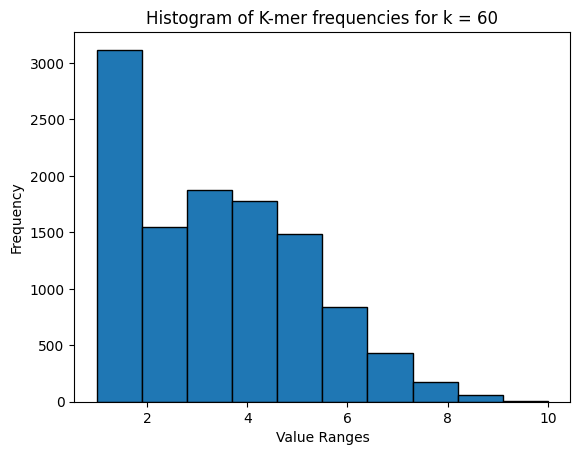

In [13]:
import matplotlib.pyplot as plt

plt.hist(k_mers.values(), edgecolor='black')

# Labels
plt.xlabel("Value Ranges")
plt.ylabel("Frequency")
plt.title("Histogram of K-mer frequencies for k = 60")

plt.show()

In [51]:
lower_freqs = [key for key, value in k_mers.items() if value <= 5]
higher_freqs = [key for key, value in k_mers.items() if value > 5]
print(len(lower_freqs), len(higher_freqs))

2007 8135


In [52]:
def hamming_distance(seq1, seq2):
    if len(seq1) != len(seq2):
        raise ValueError("Sequences must be of equal length")
    return sum(c1 != c2 for c1, c2 in zip(seq1, seq2))


replacements = {}
for u in lower_freqs:
    best = len(v)
    for v in higher_freqs:
        d = hamming_distance(u, v)
        if (d < best):
            replacements[u] = v
            best = d

    

In [54]:
def correct_sequence(seq):
    """Replace error k-mers in a sequence with corrected versions."""
    corrected_seq = list(seq)
    
    for i in range(len(seq) - k + 1):
        kmer = seq[i : i + k]
        if kmer in replacements:
            corrected_kmer = replacements[kmer]
            corrected_seq[i : i + k] = corrected_kmer  # Replace part of sequence

    return "".join(corrected_seq)

In [59]:
corrected = [correct_sequence(seq) for h, seq in seqs]

In [61]:
pprint(corrected)

['GGACCGATGGACGCAGGGGGTGCCTCTTCAGCTACCAAGGCCCGAGATAGTTACGCTTGGTTACAGGGATGATTCTGGAACTTCTGGGACGCAGGGGGTGG',
 'TAGCAACAGACATACAAACTAAAGAATTACAAAAACAAATTACAAAAATTCAAAATTTTCGGGTTTATTACAGGGACAGCAGAGATCCACTTTGGAAAGGA',
 'AACGGGTGGCTATAAAATTAAGAGAACAATTTAGAAATAAGACAATAGTTTTTAATCAATCCTCAGGAGGGGACCCAGAAATTGTAATGCACAGTTTTAAT',
 'AGTAAGACAGTATGATCAGATTCATATAGAAACCAGAGGTCATAAAGCAAGAGGTACAGTATTAATAGGACCTACACCTGTCAACATAATTGGAAGAAACC',
 'AGCATTTTACCACAAGGCCCGAGAGCTGCATCCGGAGTTCTACAAGGACTGCTGACATCGAGATTTCTACAAGGGACTTTCCGCTGGGGACTTTCCAGGGA',
 'GAAGCAGGGGCAAGGCCAATGGACATATCAAATTTATCAAGAGCCATATAAAAATCTGAAAACAGGAAAGTATGCAAAAATGAGGGGTGCTCACACTAATG',
 'CAAAATCAGCCTATATTTCAGAATCTGCAGGGGCAAATGGTACATCAGCCCATATCACCTAGAACGTTAAATGCATGGGTAAAAGTAGTAGAAGAGAAGGC',
 'TATGGCAACTAGATTGTACACATTTAGAAGGAAAAGTTATCCTGGTAGCAGTTCATGTAGCCAGTGGATATATAGAAGCAGAAGTTATTCCAGCAGAGACA',
 'TACTTCCCTGATTGGCAGAACTACACACCAGGGCCAGGGACCAGATTTCCGCTGACCTTTGGGTGGTGTTTCAAGCTAGTACCAGTTGATCCAGAAGAGGT',
 'CTATTTTGTGCATCAGATGCTAAAGCATATGATACAGAGGTACA